# More Machine Learning Algorithms

### Introduction
In the previous week, we learnt some supervised learning algorithms like KNN, Decision Trees, Naive Bayes and Random Forests. Now we will have a look at one unsupervised learning method. But first what is unsupervised learning?

### Unsupervised Learning
Have you ever used a music streaming service like Spotify or Apple Music? These services often create playlists or suggest new songs based on your listening habits. Unlike YouTube's recommendation system, which relies on supervised learning, music streaming services often use unsupervised learning techniques to find patterns in your listening behavior and suggest songs accordingly. Do you notice that the playlists recommended to you might introduce you to completely new genres or artists? How do you think it can do that?

Unsupervised learning technology can help identify patterns and groupings in data without needing explicit labels. In the case of music streaming services, unsupervised learning algorithms analyze the songs you listen to, their attributes (such as genre, tempo, and artist), and cluster similar songs together. This clustering helps the service recommend new songs or create playlists with music that you might enjoy based on your listening habits.

Unlike supervised learning, which requires labeled training data, unsupervised learning works with data that is unlabeled. The goal is to infer the natural structure present within a set of data points. For example, if we have a large dataset of songs, unsupervised learning algorithms can group these songs into clusters based on their similarities without needing predefined labels such as "liked" or "disliked."

One important concept in unsupervised learning is '_clustering_'. Clustering is the process of grouping a set of objects in such a way that objects in the same group (or cluster) are more similar to each other than to those in other groups. For instance, a music streaming service might use clustering to group songs with similar acoustic features, leading to the creation of genre-specific playlists or recommendations.

Another important concept is '_dimensionality reduction_'. Dimensionality reduction techniques are used to reduce the number of random variables under consideration by obtaining a set of principal variables. This is especially useful in simplifying data visualization and speeding up the computation. For example, in image processing, reducing the number of pixels while preserving the essential information helps in efficient image recognition.

Unsupervised learning techniques can be used for various purposes, including:

- **Clustering**: Grouping similar data points together. For example, grouping customers based on their purchasing behavior to identify different market segments.

- **Association**: Finding rules that describe large portions of data. For example, market basket analysis in retail, where we identify items that frequently co-occur in transactions.

- **Dimensionality Reduction**: Reducing the number of features under consideration. For example, simplifying a complex dataset of images to its principal components for easier analysis.

Popular algorithms used in unsupervised learning include:

- **K-means Clustering**: A method that partitions the dataset into K clusters, where each data point belongs to the cluster with the nearest mean.

- **Hierarchical Clustering**: A method of clustering that builds a hierarchy of clusters, which can be represented in a tree-like diagram called a dendrogram.

Unsupervised learning is powerful in scenarios where we have a lot of data but lack labels. It helps in discovering the hidden structure of the data, identifying patterns, and gaining insights that might not be immediately apparent.

After understanding what unsupervised learning is, let's try out K-means Clustering on the iris dataset!

We will start with the usual steps of importing libraries and reading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We already know the iris dataset doesn't have missing values but it is still good practice to check it on new datasets

In [5]:
df.isnull().sum() # get the summary of missing values for each column

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Class           0
dtype: int64

Now let us visualize the data we have (we have already done this in previous notebooks, so I won't be explaining the code. You can look into the previous week content to find the explanation)

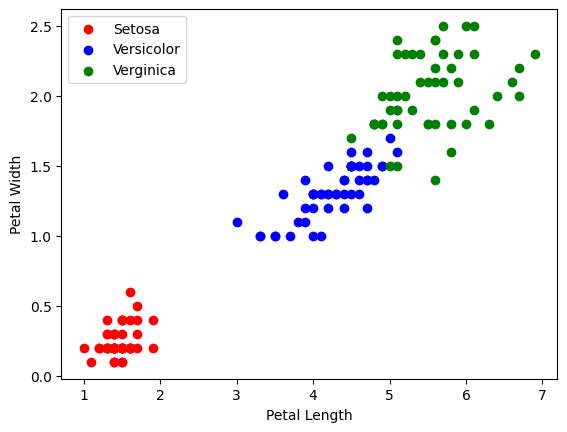

In [6]:
#Split the datframe into the 3 classes
df_Setosa = df[df['Class'] == 'Setosa']
df_Versicolor = df[df['Class'] == 'Versicolor']
df_Verginica = df[df['Class'] == 'Virginica']

#Plot the different class with different colours. The c= controls the colours and the label= controls the name shown in the legend
plt.scatter(df_Setosa['petal_length'],df_Setosa['petal_width'],c='r',label='Setosa')
plt.scatter(df_Versicolor['petal_length'],df_Versicolor['petal_width'],c='b',label='Versicolor')
plt.scatter(df_Verginica['petal_length'],df_Verginica['petal_width'],c='g',label='Verginica')

#Add in the axis and legend
plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.show()

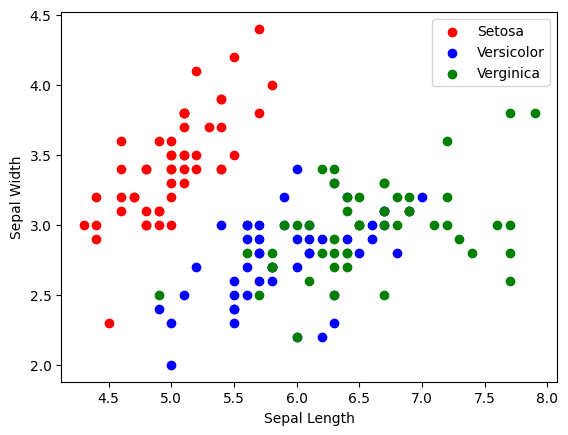

In [7]:
plt.scatter(df_Setosa['sepal_length'],df_Setosa['sepal_width'],c='r',label='Setosa')
plt.scatter(df_Versicolor['sepal_length'],df_Versicolor['sepal_width'],c='b',label='Versicolor')
plt.scatter(df_Verginica['sepal_length'],df_Verginica['sepal_width'],c='g',label='Verginica')

#Add in the axis and legend
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.show()

We can see that it is possible to cluster petal length and petal width for all classes while setosa is easy to cluster for sepal length and sepal width.

Now let's make our training data. If you remember this is an unsupervised model, hence we don't need the classes column

In [11]:
clustering_data = df.drop(['Class'],axis=1)
clustering_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Modelling 

#### K-Means-Clustering
K-means clustering is a popular and straightforward algorithm used in unsupervised learning for partitioning a dataset into K distinct, non-overlapping subsets or clusters. Each data point belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

Here's how K-means clustering works:

1. **Initialization**: Choose the number of clusters, K. This can be done using various methods, but a common approach is to randomly select K data points as the initial cluster centroids.

2. **Assignment** Step: Assign each data point to the nearest cluster centroid. This is typically done by calculating the Euclidean distance between the data point and each centroid and assigning the point to the cluster with the nearest centroid.

3. **Update Step**: Recalculate the centroids as the mean of all data points assigned to each cluster. The centroid is updated to be the average of the points in the cluster.

4. **Convergence**: Repeat the assignment and update steps until the centroids no longer change significantly or until a predefined number of iterations is reached.

Here, the number of clusters K is a hyperparameter. We will find this K value based on inertia and elbow method. Inertia is a measure of how well the clustering has been done. It is also known as the "within-cluster sum of squares" (WCSS). Specifically, inertia is the sum of squared distances between each data point and its assigned cluster centroid.

#### The Elbow Method
The Elbow Method involves plotting the inertia for different values of K and looking for an "elbow" point in the plot. The elbow point represents the point beyond which the decrease in inertia slows down significantly. This point is considered a good choice for the number of clusters, balancing between minimizing inertia and avoiding overfitting.

1. **Plot Inertia vs. Number of Clusters**: Run the K-means algorithm for different values of K (e.g., 1 to 10) and calculate the inertia for each K.
2. **Identify the Elbow Point**: Look for the point where the rate of decrease in inertia slows down, forming an "elbow" shape on the plot.

``sklearn`` provides a ``Kmeans`` model in its ``cluster`` set of models. we will be using that here

In [12]:
from sklearn.cluster import KMeans

In [14]:
wcss_scores = []

for i in range(1,11):
    kmean_model = KMeans(n_clusters=i, n_init='auto') # create a KMeans model with i clusters
    kmean_model.fit(clustering_data) # fit the model to the data
    wcss_scores.append(kmean_model.inertia_) # get the WCSS score and append it to the list. the inertia_ attribute gives the WCSS score

np.array(wcss_scores) # convert the list to a numpy array to use it in the plot



array([681.3706    , 152.34795176,  78.85144143,  57.38387327,
        46.71230193,  42.49832906,  38.50069459,  33.44707175,
        28.25452669,  26.91254762])

Cool we have wcss scores, lets plot it

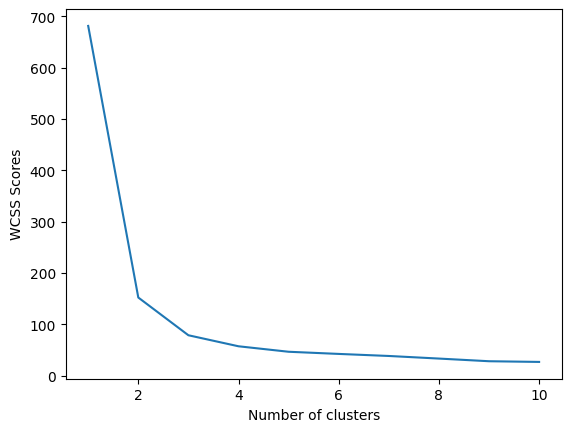

In [15]:
# plot the WCSS scores
plt.plot(range(1,11),wcss_scores)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS Scores')
plt.show()

okay this looks like an elbow. according to the definition of the elbow method, we need to look for the point wehre the slope starts decreasing less. in this case that would be at K = 3, so, we will use K = 3, i.e, 3 cluster centroids

### Clustering
Now we will build the model for creating clusters from the dataset. We will use ``n_clusters = 3`` i.e. 3 clusters as we have determined by the elbow method, which would be optimal for our dataset.

Our data set is for unsupervised learning therefore we will use ``fit_predict()`` Suppose we were working with supervised learning data set we would use ``fit_tranform()``

In [16]:
kmean_model = KMeans(n_clusters=3, n_init='auto') # create a KMeans model with 3 clusters
kmean_model.fit(clustering_data) # fit the model to the data

KMeans(n_clusters=3, n_init='auto')

Now, using this let's predict classes and append it to a dataframe

In [17]:
clusters = clustering_data.copy() # create a copy of the data
clusters["Predicted Class"] = kmean_model.fit_predict(clustering_data) # add a new column to the data with the predicted class
clusters.head()

,sepal_length,sepal_width,petal_length,petal_width,Predicted Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


We can also get the centroids of the clusters by the ``cluster_centers_`` attribute of KMeans algorithm.

In [26]:
kmean_model.cluster_centers_ # get the cluster centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

What does this array mean? let's try to understand

In [29]:
kmean_model.cluster_centers_.shape

(3, 4)

okay the 3 means that we have 3 cluster centroids. what about the 4? it means that each centroid has 4 dimensions. Remember that ML algorithms work in higher dimensions as well, so for the centroid ``[5.9016129 , 2.7483871 , 4.39354839, 1.43387097]`` they correspond to ``[x y z w]`` coordinates. It has 4 dimensions as we used 4 features, ``x`` and ``y`` correspond to sepals while ``z`` and ``w`` correspond to petals

Let's plot the centroids. we will use the z and w coordinate for petals and x and y coordiate for the sepals

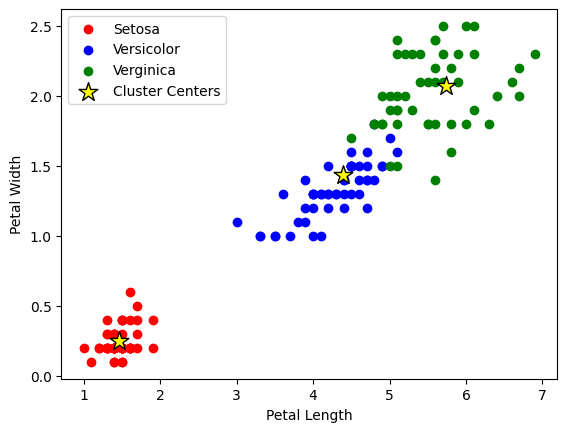

In [34]:
#Plot the different class with different colours. The c= controls the colours and the label= controls the name shown in the legend
plt.scatter(df_Setosa['petal_length'],df_Setosa['petal_width'],c='r',label='Setosa')
plt.scatter(df_Versicolor['petal_length'],df_Versicolor['petal_width'],c='b',label='Versicolor')
plt.scatter(df_Verginica['petal_length'],df_Verginica['petal_width'],c='g',label='Verginica')

#Plot the cluster centers
plt.scatter(kmean_model.cluster_centers_[:,2],kmean_model.cluster_centers_[:,3],marker="*",c='yellow',edgecolor="black",label='Cluster Centers', s=200) # the cluster centers for petals are the last 2 columns of the cluster_centers_ attribute

#Add in the axis and legend
plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

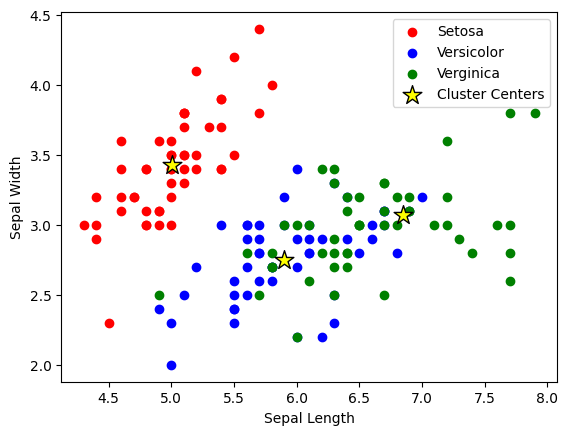

In [35]:
plt.scatter(df_Setosa['sepal_length'],df_Setosa['sepal_width'],c='r',label='Setosa')
plt.scatter(df_Versicolor['sepal_length'],df_Versicolor['sepal_width'],c='b',label='Versicolor')
plt.scatter(df_Verginica['sepal_length'],df_Verginica['sepal_width'],c='g',label='Verginica')

plt.scatter(kmean_model.cluster_centers_[:,0],kmean_model.cluster_centers_[:,1],marker="*",c='yellow',edgecolor="black",label='Cluster Centers', s=200) # the cluster centers for petals are the last 2 columns of the cluster_centers_ attribute

#Add in the axis and legend
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.show()